# Task 1: Data Collection and Web Scrapping

*   Description: Collect data from website using scrapping techniques.

*   In this task, we are utilizing web scraping techniques to extract data from the Wikipedia page "List of largest companies in the United States by revenue". This is a common method for gathering structured data from web pages that are not available in downloadable formats like CSV or Excel.


*   Overview of the Web Scraping Process:
1.  Requesting the webpage:
The task starts by sending a request to the Wikipedia page using the requests library. The URL https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue is fetched, which contains a table listing the largest companies in the United States based on revenue.

2.  Parsing the HTML content:
The HTML content of the page is then parsed using BeautifulSoup. This allows the structured representation of the webpage that can be manipulated for data extraction.

3. Identifying and locating the table:
We are specifically interested in a table with class wikitable sortable, which contains the relevant data. This table is located in the HTML structure by searching for a "table" tag with the specific class.

4. Extracting data:
Once the table is located, all rows "tr" are extracted. The first row typically contains the column headers "th", while the remaining rows contain the data "td". These rows are iterated over, and the text data from each cell is cleaned and stored in a structured format.

5. Creating a DataFrame:
After extracting the data, it is organized into a pandas DataFrame, with the column titles from the header row and each subsequent row representing the data for a company. This structured format makes it easy to manipulate and analyze the data.

6. Saving the data:
Finally, the cleaned data is saved to a CSV file "all_fmcg_companies_by_revenue.csv" for later use, making it easy to access and perform further analysis.

Summary of Data:
The data extracted from the page includes the following columns:



*   Rank: Position of the company in the list.

*   Name: The name of the company.

*   Industry: The industry in which the company operates.

*   Revenue (USD millions): The revenue in millions of dollars for each company.

*   Revenue Growth: The percentage change in revenue.

*   Employees: The number of employees in the company.

*   Headquarters: The location of the company's headquarters.

This scraping process is a simple but effective way to gather data from websites that do not provide direct data downloads, and it can be adapted for other use cases or websites with structured data.

In [195]:
# Import necessary libraries
import pandas as pd  # For manipulating data with DataFrame
import matplotlib.pyplot as plt  # For data visualization in the form of plots

# Part 1: Web Scraping to extract data from Wikipedia
from bs4 import BeautifulSoup  # Library for parsing HTML
import requests  # Library to fetch data from a URL

In [196]:
# Fetching the page from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)  # Get the page from the URL

In [197]:
# Using BeautifulSoup to parse the HTML from the page
soup = BeautifulSoup(page.text, 'html')  # Convert HTML into a BeautifulSoup object

In [198]:
# Print the entire HTML (for debugging purposes)
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featu

In [199]:
# Find the first table in the HTML
soup.find('table')

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [200]:
# Find the table with the class 'wikitable sortable' which is used for tables in Wikipedia
soup.find('table', class_ = 'wikitable sortable')


<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [201]:
# Store the found table into the variable 'table'
table = soup.find('table', class_ = 'wikitable sortable')

In [202]:
# Print the contents of the table for verification
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [203]:
# Extract all the rows from the table
column_data = table.find_all('tr')  # Find all the row elements (tr)

In [204]:
# Extract and clean the column titles (th) from the first row
world_titles = column_data[0].find_all('th')  # Find header elements (th)

In [205]:
# Display the column titles
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [206]:
# Clean up the column titles and store them as a list
world_table_titles = [title.text.strip() for title in world_titles]

In [207]:
# Display the cleaned column titles
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [208]:
# Create a pandas DataFrame using the cleaned column titles as the headers
df = pd.DataFrame(columns=world_table_titles)

In [209]:
# Loop through the remaining rows (excluding the header) and add them to the DataFrame
for row in column_data[1:]:
    row_data = row.find_all('td')  # Find all the column elements in a single row
    individual_row_data = [data.text.strip() for data in row_data]  # Clean the text and remove extra spaces

    # Add the row data to the DataFrame
    length = len(df)
    df.loc[length] = individual_row_data  # Append the row to the DataFrame


In [210]:
# Print the DataFrame to check the scraped data
print(df)

   Rank                  Name                    Industry  \
0     1               Walmart                      Retail   
1     2                Amazon  Retail and cloud computing   
2     3                 Apple        Electronics industry   
3     4    UnitedHealth Group                  Healthcare   
4     5    Berkshire Hathaway                Conglomerate   
..  ...                   ...                         ...   
95   96                  TIAA                  Financials   
96   97                   CHS     Agriculture cooperative   
97   98  Bristol-Myers Squibb     Pharmaceutical industry   
98   99  Dow Chemical Company           Chemical industry   
99  100              Best Buy                      Retail   

   Revenue (USD millions) Revenue growth  Employees  \
0                 648,125           6.0%  2,100,000   
1                 574,785          11.9%  1,525,000   
2                 383,482          -2.8%    161,000   
3                 371,622          14.6%    440

In [211]:
# Print the column names of the DataFrame
print(df.columns)

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')


In [212]:
# Save the DataFrame as a CSV file
df.to_csv('all_fmcg_companies_by_revenue.csv', index=False)  # Save to CSV without including index

In [213]:
# Part 2: Reading the saved CSV file
df = pd.read_csv('all_fmcg_companies_by_revenue.csv')  # Read the data from the saved CSV file
print(df.head())  # Display the first 5 rows to verify the data is loaded correctly

   Rank                Name                    Industry  \
0     1             Walmart                      Retail   
1     2              Amazon  Retail and cloud computing   
2     3               Apple        Electronics industry   
3     4  UnitedHealth Group                  Healthcare   
4     5  Berkshire Hathaway                Conglomerate   

  Revenue (USD millions) Revenue growth  Employees           Headquarters  
0                648,125           6.0%  2,100,000  Bentonville, Arkansas  
1                574,785          11.9%  1,525,000    Seattle, Washington  
2                383,482          -2.8%    161,000  Cupertino, California  
3                371,622          14.6%    440,000  Minnetonka, Minnesota  
4                364,482          20.7%    396,500        Omaha, Nebraska  


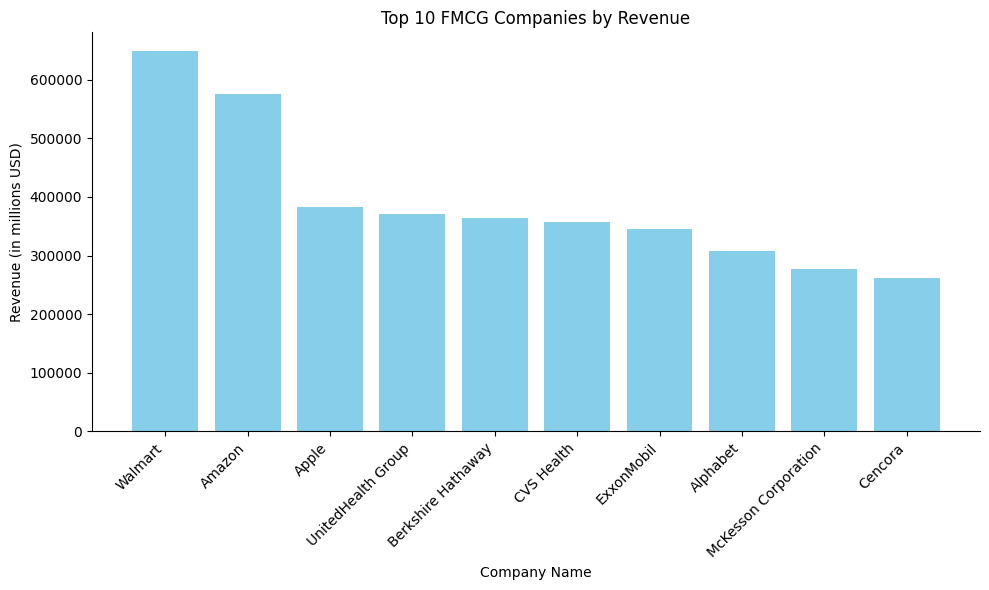

In [214]:
# Part 3: Data Visualization - Revenue (USD millions)

# Clean up the 'Revenue (USD millions)' column by removing commas and converting it to numeric
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].replace({',': ''}, regex=True).astype(float)

# Select the top 10 companies based on their rank (excluding the header)
df_top_10 = df.iloc[0:10]

# Create a bar plot for Revenue (in millions USD)
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(df_top_10['Name'], df_top_10['Revenue (USD millions)'], color='skyblue')  # Create a bar plot

# Remove gridlines and top/right borders
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and a title to the plot
plt.xlabel('Company Name')  # X-axis label
plt.ylabel('Revenue (in millions USD)')  # Y-axis label
plt.title('Top 10 FMCG Companies by Revenue')  # Plot title

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust the layout to ensure nothing is cut off
plt.show()  # Show the plot

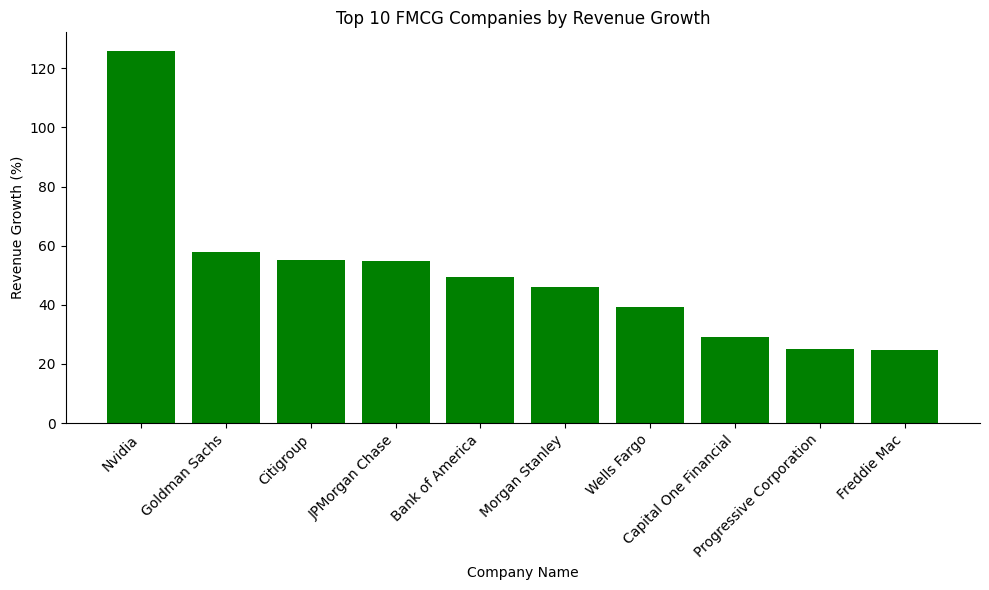

In [215]:
# Part 4: Data Visualization - Revenue Growth

# Clean up the 'Revenue growth' column by removing the '%' symbol and converting it to numeric
df['Revenue growth'] = df['Revenue growth'].replace({'%': ''}, regex=True).astype(float)

# Sort the DataFrame by 'Revenue growth' in descending order and select the top 10
df_top_10_growth = df.sort_values(by='Revenue growth', ascending=False).head(10)

# Create a bar plot for Revenue Growth
plt.figure(figsize=(10, 6))
plt.bar(df_top_10_growth['Name'], df_top_10_growth['Revenue growth'], color='green')  # Create a bar plot

# Remove gridlines and top/right borders
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and a title to the plot
plt.xlabel('Company Name')  # X-axis label
plt.ylabel('Revenue Growth (%)')  # Y-axis label
plt.title('Top 10 FMCG Companies by Revenue Growth')  # Plot title

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust the layout to ensure nothing is cut off
plt.show()  # Show the plot


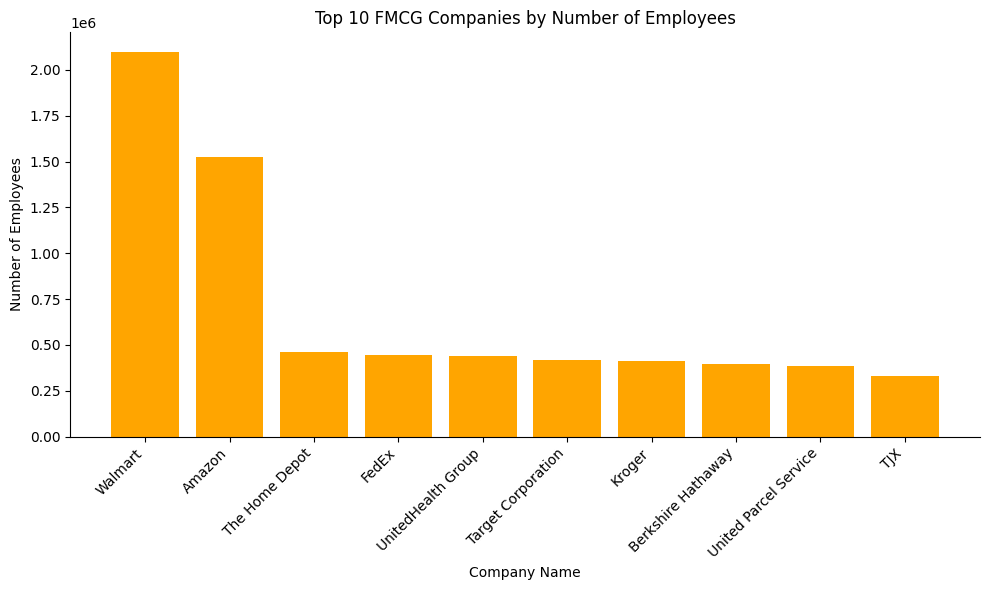

In [216]:
# Part 5: Data Visualization - Employees

# Clean up the 'Employees' column by removing commas and converting it to numeric
df['Employees'] = df['Employees'].replace({',': ''}, regex=True).astype(float)

# Sort the DataFrame by 'Employees' in descending order and select the top 10
df_top_10_employees = df.sort_values(by='Employees', ascending=False).head(10)

# Create a bar plot for the number of employees
plt.figure(figsize=(10, 6))
plt.bar(df_top_10_employees['Name'], df_top_10_employees['Employees'], color='orange')  # Create a bar plot

# Remove gridlines and top/right borders
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and a title to the plot
plt.xlabel('Company Name')  # X-axis label
plt.ylabel('Number of Employees')  # Y-axis label
plt.title('Top 10 FMCG Companies by Number of Employees')  # Plot title

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust the layout to ensure nothing is cut off
plt.show()  # Show the plot